In [202]:
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit


In [203]:
#some data from f259 github
times = np.array([3.44 ,2.75, 2.34, 2.13, 1.81 ]) # segundos
h0 = 80 #cm
m_sum = np.array([1.785, 1.803, 1.823, 1.842, 1.867]) #kg
m_delta = np.array([ 0.047, 0.065, 0.085, 0.104, 0.129]) #kg

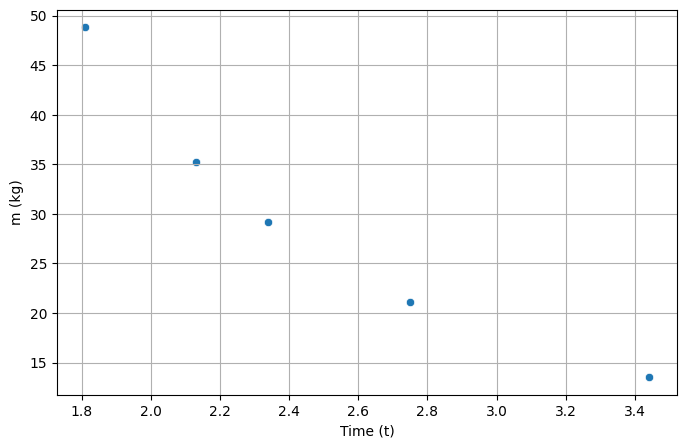

In [204]:
#aceleration
avec = 2*h0/times**2

fig, ax = plt.subplots(1,1,figsize =(8,5))
ax.set_xlabel('Time (t)')
ax.set_ylabel('m (kg)')
sns.scatterplot(x=times, y=avec)
plt.grid()
plt.show()


[ 12.61728052 -87.38193092 165.05279367]
[[   3.1313578   -16.59047165   20.90713821]
 [ -16.59047165   88.66514078 -112.67994338]
 [  20.90713821 -112.67994338  144.59781019]]


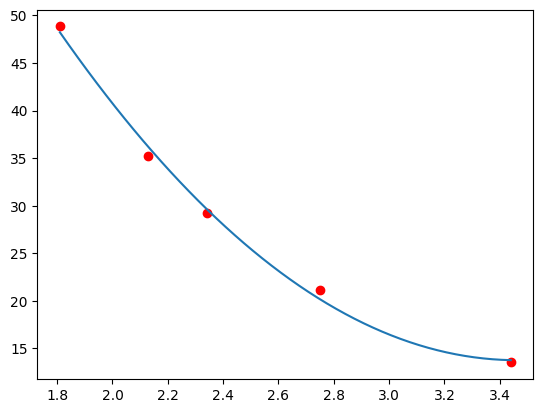

In [205]:
#usando o metodo polyfit do numpy
x = times
y = avec

coef,cov = np.polyfit(x,y,2,cov=True)#retorna os coeficientes(+covariancia se cov=True)
my_model = np.poly1d(coef)#acho que meio que cria a função com os coef de polyfit

myline = np.linspace(min(x),max(x),50)#eixo x no qual vai aplicar a função pra gerar a curva
#plt.scatter(times,avec)#can let this and remove tims,avec and 'ro' from last line instead

print(coef,cov,sep='\n')
plt.plot(times, avec, 'ro',myline, my_model(myline))#plota a curva, x é myline e y é my_model(myline)(função aplicada aos pontos de myline)
#ro means red and circle, in this cae without it it plot two lines

[ 12.61728028 -87.38192966 165.0527921 ]

[[   3.1313583   -16.59047443   20.90714165]
 [ -16.59047443   88.66515632 -112.67996267]
 [  20.90714165 -112.67996267  144.59783413]]


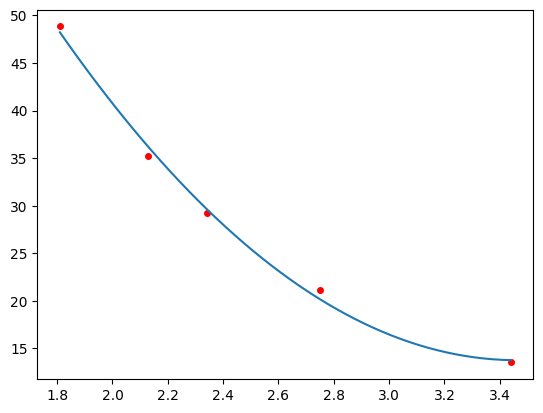

In [206]:
#usando o método optimize.curve_fit do Scipy

#tem que criar uma função do grau desejado
def func(x,a,b,c):
    return a*(x**2)+b*x+c
x = times
y = avec
coeficientes,covariance = curve_fit(func,x,y )#devolve 1.os valores dos coef e 2.matriz covar

print(coeficientes,covariance,sep="\n\n")

#valores pra plotar a curva
x_data = np.linspace(min(x),max(x),50)
y_data = func(x_data, *coeficientes)
plt.plot(x,y,'ro',x_data,y_data,ms=4)#ms tamanho do ponto, 'ro' red circulo

***
* Baseado neste teste os dois métodos resultaram nos mesmos coeficiente, curva e covariancia ao menos para este caso
***

# Trabalhando com incertezas

In [207]:
dataset = pd.read_csv("hypo_data.csv")
display(dataset)

,x,u_x,y,u_y
0,0.10,0.010,26.40,2.5
1,0.15,0.012,22.10,2.8
2,0.20,0.014,35.80,3.0
3,0.25,0.010,30.50,3.2
4,0.30,0.012,47.10,3.5
5,0.35,0.014,39.85,3.8
6,0.40,0.010,62.50,4.0
7,0.45,0.012,52.15,4.3
8,0.50,0.014,80.25,4.5
9,0.55,0.010,65.90,4.8


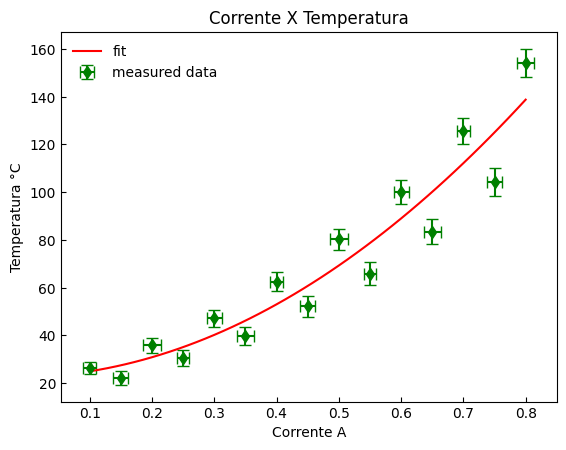

25.2548705469967
21.01267949507526
3.532501749307512


In [208]:
from math import sin
x,u_x,y,u_y = dataset['x'],dataset['u_x'],dataset['y'],dataset['u_y']

#criar figura
fig1 = plt.figure()
ax = fig1.add_subplot(1,1,1)

#barras de erro (já são o plot dos pontos)
ax.errorbar(
            x,y,
            xerr=u_x,yerr=u_y,
            label='measured data',
            linestyle='none',
            color='green',
            marker='d',
            capsize=4
            )

#------------curve_fit-------------
def func2(x,a,b,c):
    return a*(x**2)+b*x+c

coef, cov = curve_fit(func2,x,y,sigma=u_y,absolute_sigma=True)

xfit = np.linspace(min(x),max(x),50)
yfit = func2(xfit,*coef)

#raiz da diag matriz cov sao erros dos coef
a_err = np.sqrt(cov[0][0])
b_err = np.sqrt(cov[1][1])
c_err = np.sqrt(cov[2][2])
#---------------------------------

#plot da curva de fit
ax.plot(xfit,yfit,
        color='red',
        label= 'fit',
        #linestyle='dashed'
        )

#figure options
ax.set_title('Corrente X Temperatura')
ax.set_xlabel('Corrente [A]')
ax.set_ylabel('Temperatura [°C]')
ax.tick_params(axis='both',direction='in')
ax.legend(frameon = False)

#plot
plt.show()
#print
print(a_err,b_err,c_err,sep='\n')
